## Noisy CTA north IRFs

Julien / Bruno mentioned via email that there are problems with CTA 1DC analyses with Gammapy, because the north IRFs have noisy AEFF and EDISP. This is a very quick look ...

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# import os
# os.environ["CTADATA"] = "/Users/julien/Documents/WorkingDir/Tools/python/cta_1dc/1dc/"


/Users/deil/Library/Python/3.6/lib/python/site-packages/astropy/units/quantity.py:634: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


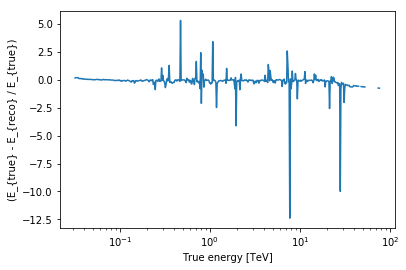

In [5]:
import astropy.units as u 
from gammapy.data import DataStore

# Load data
data_store = DataStore.from_dir('$CTADATA/index/agn')
obs_list = data_store.obs_list([510004])

# edisp
ed = obs_list[0].edisp
emin = 0.03 * u.TeV
emax = 20 * u.TeV
e_reco =  np.logspace(np.log10(emin.value),np.log10(emax.value),40).tolist() * u.TeV
e_true=np.logspace(-1.5, 2, 500) * u.TeV
rmf = ed.to_energy_dispersion(0.*u.deg,
                              e_true=e_true,
                              e_reco=e_reco)

rmf.plot_bias()

In [6]:
obs = obs_list[0]

In [9]:
obs.events.table.meta

OrderedDict([('EXTNAME', 'EVENTS'),
             ('DSTYP1', 'TIME'),
             ('DSUNI1', 's'),
             ('DSVAL1', 'TABLE'),
             ('DSREF1', ':GTI'),
             ('DSTYP2', 'ENERGY'),
             ('DSUNI2', 'TeV'),
             ('DSVAL2', '0.03:50'),
             ('DSTYP3', 'POS(RA,DEC)'),
             ('DSUNI3', 'deg'),
             ('DSVAL3', 'CIRCLE(166.1196,38.2073,5)'),
             ('NDSKEYS', 3),
             ('NMCIDS', 3),
             ('MID00001', 1832),
             ('MMN00001', '2FHL_J1104.4+3812'),
             ('MID00002', 2006),
             ('MMN00002', '1FHL_J1100.6+4018'),
             ('MID00003', 1),
             ('MMN00003', 'Background model'),
             ('CREATOR', 'ctobssim (1.4.0)'),
             ('TELESCOP', 'CTA'),
             ('OBS_ID', 510004),
             ('DATE_OBS', '2021-01-01'),
             ('TIME_OBS', '14:06:51'),
             ('DATE_END', '2021-01-01'),
             ('TIME_END', '14:36:51'),
             ('TSTART', 662782080.0

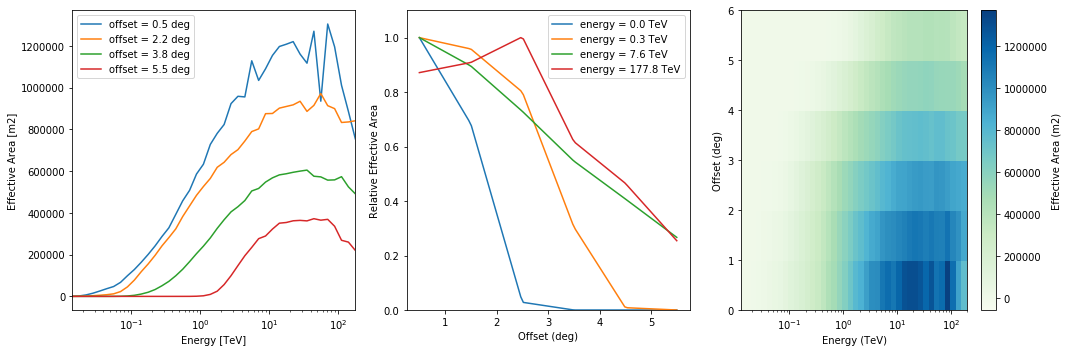

In [10]:
obs.aeff.peek()

In [12]:
obs.aeff.data.data.min()

<Quantity 0.0 m2>

In [13]:
obs.edisp.data.data.min()

<Quantity 0.0>

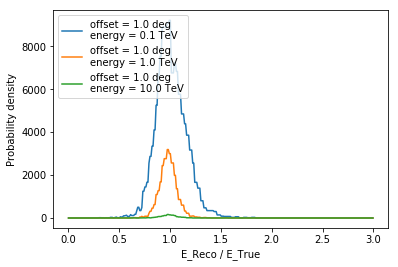

In [15]:
obs.edisp.plot_migration()

In [16]:
obs.edisp.peek()

/Users/deil/Library/Python/3.6/lib/python/site-packages/astropy/units/quantity.py:634: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/colors.py:1238: UserWarning: Power-law scaling on negative values is ill-defined, clamping to 0.
  warnings.warn("Power-law scaling on negative values is "


AttributeError: 'numpy.ndarray' object has no attribute '_set_unit'